In [1]:
import igraph as ig
import pandas as pd
import numpy as np

In [2]:
df_pr = pd.read_csv('top_10_pr_aj.csv')
df_pr

,name,pagerank
0,British Virgin Islands,0.263850
1,Panama,0.128837
2,Barbados,0.080968
3,Bahamas,0.050375
4,Hong Kong,0.046558
5,United Kingdom,0.046447
6,Seychelles,0.037883
7,Russia,0.031472
8,Niue,0.028551
9,Bermuda,0.016875


In [3]:
top_10_pr = df_pr['name'].tolist()

In [4]:
edge_df = pd.read_csv('combined_final_weighted.csv')
edge_df

,node_start,node_end,status,weight
0,Hong Kong,Samoa,jurisdiction,2.0
1,Hong Kong,Samoa,jurisdiction,2.0
2,Hong Kong,Samoa,jurisdiction,2.0
3,Hong Kong,Samoa,jurisdiction,2.0
4,Hong Kong,Samoa,jurisdiction,2.0
...,...,...,...,...
338119,Indonesia,British Virgin Islands,officer_base,1.0
338120,Cook Islands,British Virgin Islands,officer_base,1.0
338121,Hong Kong,British Virgin Islands,officer_base,1.0
338122,Cook Islands,United Kingdom,officer_base,1.0


In [5]:
jurisdiction_list = ['jurisdiction', 'officer_jurisdiction','intermediary jurisdiction']

In [6]:
edge_df = edge_df[edge_df['status'].isin(jurisdiction_list)]
edge_df = edge_df.drop(['status'], axis = 1)
edge_df = edge_df.groupby(['node_start','node_end'], as_index = False).sum()
edge_df

,node_start,node_end,weight
0,Albania,Bahamas,4.0
1,Andorra,Bahamas,52.0
2,Andorra,British Virgin Islands,78.0
3,Andorra,Cayman Islands,2.0
4,Andorra,Costa Rica,6.0
...,...,...,...
1222,Vietnam,Panama,2.0
1223,Yemen,Panama,2.0
1224,Zambia,British Virgin Islands,4.0
1225,Zimbabwe,British Virgin Islands,10.0


In [7]:
top_10_pr_edges = edge_df[edge_df['node_start'].isin(top_10_pr)]
top_10_pr_edges = top_10_pr_edges[top_10_pr_edges['node_end'].isin(top_10_pr)]
top_10_pr_edges

,node_start,node_end,weight
59,Bahamas,Barbados,100.0
60,Bahamas,Bermuda,18.0
62,Bahamas,British Virgin Islands,3528.0
67,Bahamas,Hong Kong,12.0
71,Bahamas,Niue,116.0
72,Bahamas,Panama,4512.0
74,Bahamas,Seychelles,210.0
75,Bahamas,United Kingdom,8.0
84,Barbados,Bahamas,4.0
85,Barbados,Bermuda,16.0


In [8]:
#top_10_pr_edges.to_csv('top_10_pagerank_edgelist.csv', index = False)

In [9]:
g = ig.Graph.TupleList(top_10_pr_edges.itertuples(index=False), directed=True, edge_attrs={'weight': "weight"})

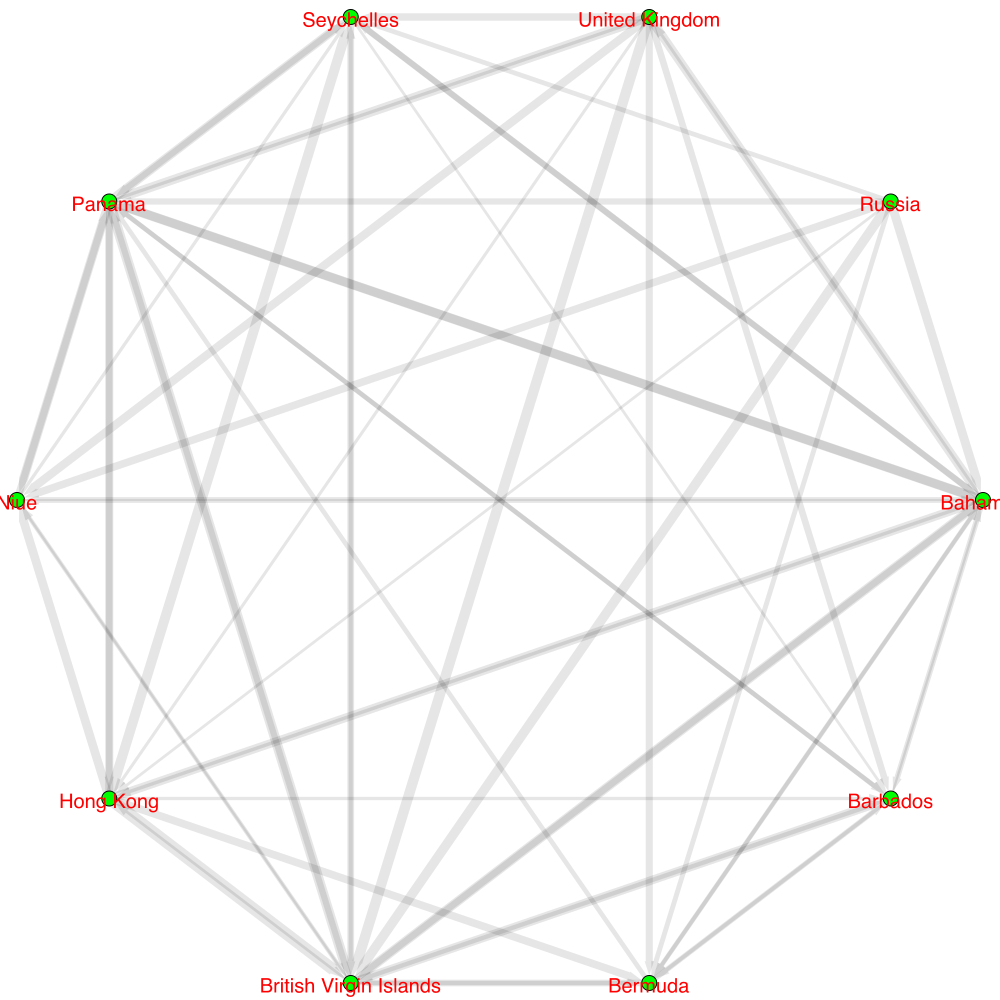

In [10]:
##plot community
visual_style = {}

# Set bbox and margin
visual_style["bbox"] = (1000,1000)
visual_style["margin"] = 17

# Set vertex colours
visual_style["vertex_color"] = 'green'

# Set edge width
visual_style["edge_width"] = np.log(g.es['weight']) + 1

# Set edge color
visual_style["edge_color"] = "rgba(1,1,1,0.1)" 

# Set vertex size
visual_style["vertex_size"] = 15

# Set vertex label size
visual_style["vertex_label_size"] = 20

# Set vertex label color
visual_style["vertex_label_color"] = 'red'

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
my_layout = g.layout_circle()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'top_10_pr_chord.png', vertex_label = g.vs['name'] , **visual_style)